# Package loading

In [4]:
import numpy as np
import pandas as pd
import os
import shapely
from shapely.geometry.point import Point
from shapely.geometry import Polygon, LineString, Point
import dxfgrabber as dxfgb
import matplotlib.pyplot as plt
import math

In [5]:
from dxfreader import DxfParser

# Sub features

In [3]:
def plot_dxf(dxfdetails):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    for closedsection in dxfdetails['closed_patterns']:
        poly = Polygon(closedsection)
        x, y = poly.exterior.xy
        plt.plot(x, y, color='g', alpha=0.5)
    
    for opensection in dxfdetails['open_patterns']:
        lines = LineString(opensection)
        x, y = lines.xy
        plt.plot(x, y, color='y', alpha=1)
    
    for bendlines, tangents in zip(dxfdetails['bend_line'], dxfdetails['tangents_coords']):
        lines = LineString(bendlines)
        color = (np.random.rand(),np.random.rand(),np.random.rand())
        x, y = lines.xy
        plt.plot(x, y, color=color)
        for tangent in tangents:
            lines = LineString(tangent)
            x, y = lines.xy
            plt.plot(x, y, color=color)
    
    centeraxis = dxfdetails['bend_center']
    for center, angle, direction, radius in zip(centeraxis,
                                               dxfdetails['bend_angle'],
                                               dxfdetails['bend_direction'],
                                               dxfdetails['bend_radius']):
        ax.text(center[0], center[1], '{} - {} - {}'.format(angle, direction, radius), color='c')
        
    
    poly = Polygon(dxfdetails['minimum_rectangle_coords'])
    x, y = poly.exterior.xy
    plt.plot(x, y, color='r')
    
    poly = Polygon(dxfdetails['convex_hull_coords'])
    x, y = poly.exterior.xy
    plt.plot(x, y, color='b')
    
    ax.set_aspect('equal')
    #ax.set_xlim([345,355])
    #ax.set_ylim([95,105])
    plt.show()
    
#plot_dxf(details)

# Package documentation

http://dxfgrabber.readthedocs.io/en/latest/  
https://shapely.readthedocs.io/en/latest/

# DXF loading

In [24]:
#List of all the dixs in the folder
dxffolder = '../Y2 - Sample DXF'
dxflist = [os.path.join(dxffolder, file) for file in os.listdir(dxffolder) if file.endswith('.dxf')]
for index, path in enumerate(dxflist):
    #print('{:02d} --> '.format(index), path.split('/')[-1])
    pass

In [ ]:
dxflist[3].split('/')[-1][1:3]

In [ ]:
dxf = dxfgb.readfile(dxflist[34])
print(dxf.dxfversion)
validentities = ['LINE', 'ARC', 'ELLIPSE', 'CIRCLE', 'SPLINE']
#for element in [element for element in dxf.modelspace()]: #   if element.dxftype == 'MTEXT'
#for element in [element for element in dxf.modelspace() if element.dxftype == 'MTEXT']: #
for element in [element for element in dxf.modelspace()]: #
#for element in [element for element in dxf.modelspace() if element.linetype == 'PHANTOM']:
    #print(np.round(x.start,3))
    print(element)
    print(element.color)
    #print(element.dxftype)
    try:
        print(element.text, '-',  element.insert, element.align_point, element.halign)
    except:
        pass
    try:
        print(element.points)
        print(element.is_closed)
    except:
        pass
    try:
        print(element.plain_text(split=False))
        #for line in element.plain_text(split=False).split('\n'):
        #    print(line.split(':'))
        #    print()
        #print(element.lines())
        #print(element.insert)
    except:
        pass
    #print(element.linetype)
    #
    #print(element.insert)
    #print(element.center, element.major_axis, element.ratio, element.start_param, element.end_param)
    #print(np.round(element.control_points, 3)[:,0:2])
    print()

# DXF reading module

In [23]:
from dxfreader import DxfParser

fileid = 2

dxfparser = DxfParser(min_edge_length=1, roundigexp=2)
print(dxflist[fileid])
details = dxfparser.parse(dxflist[fileid])
details.keys()
#details['closed_patterns']
#details['total_surface']

../Y2 - Sample DXF/l1607120_flat1.dxf
color ID 7
20


dict_keys(['thickness', 'unit', 'material', 'radius', 'bend_angle', 'bend_direction', 'bend_radius', 'bend_center', 'closed_patterns', 'open_patterns', 'cut_length', 'total_area', 'minimum_rectangle_coords', 'minimum_rectangle_area', 'minimum_rectangle_dim1', 'minimum_rectangle_dim2', 'no_hole_area', 'num_closed_patterns', 'num_open_patterns', 'convex_hull_coords', 'convex_hull_area', 'bend_line', 'tangents_coords', 'punch_length', 'deformation_length', 'bend_bend_distance', 'bend_bend_angle', 'merged_bend', 'bend_edge_distance', 'bend_edge_angle', 'bend_edge_length'])

In [ ]:
details['open_patterns']

# Plot a DXF

In [ ]:
plot_dxf(details)

# Dataset creation

OK -  0  -  l1600620_flat1
color ID 3
12


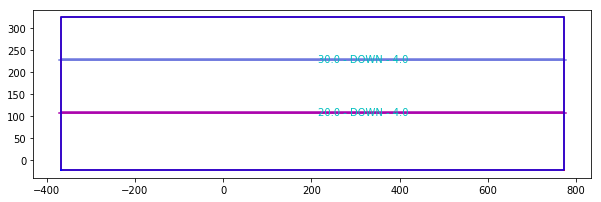

OK -  1  -  l1603760_flat1
color ID 3
12


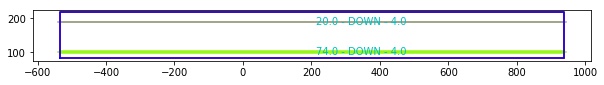

OK -  2  -  l1607120_flat1
color ID 7
20


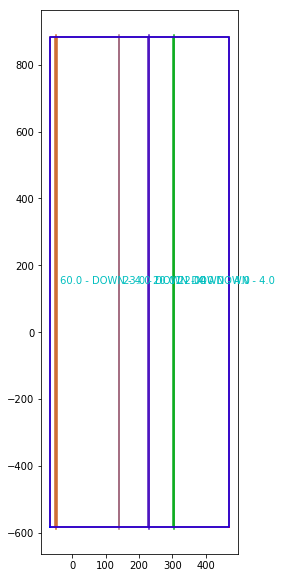

OK -  3  -  l1620100_flat1
color ID 3
24


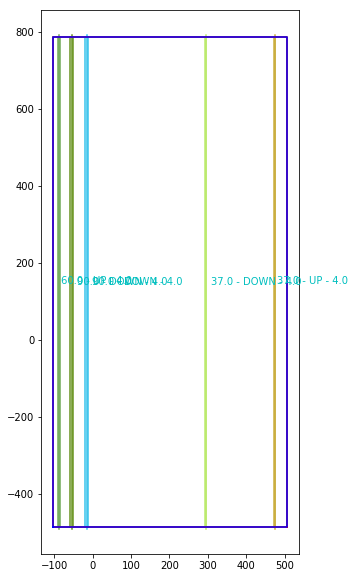

OK -  4  -  l2516640_flat1
color ID 7
19


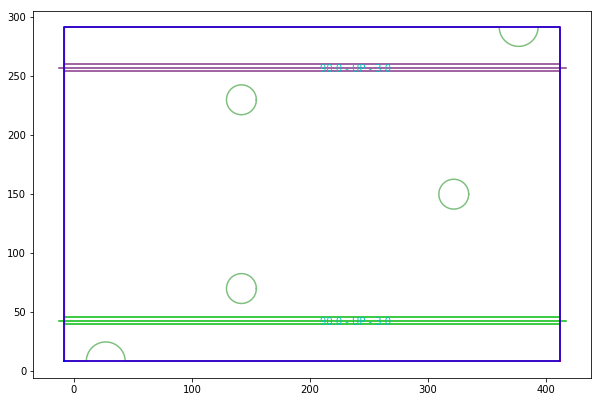

OK -  5  -  l3009412_flat1
color ID 7
10


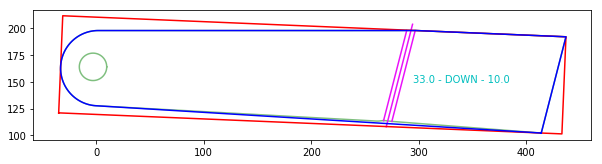

OK -  6  -  l3029670_flat1
color ID 7
16


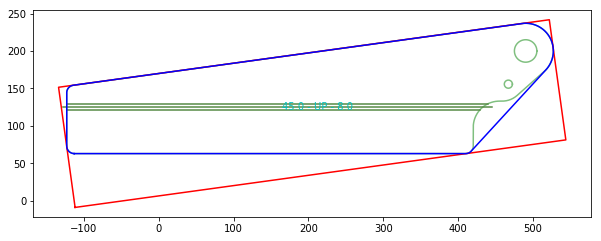

OK -  7  -  l3047580_flat1
color ID 7
8


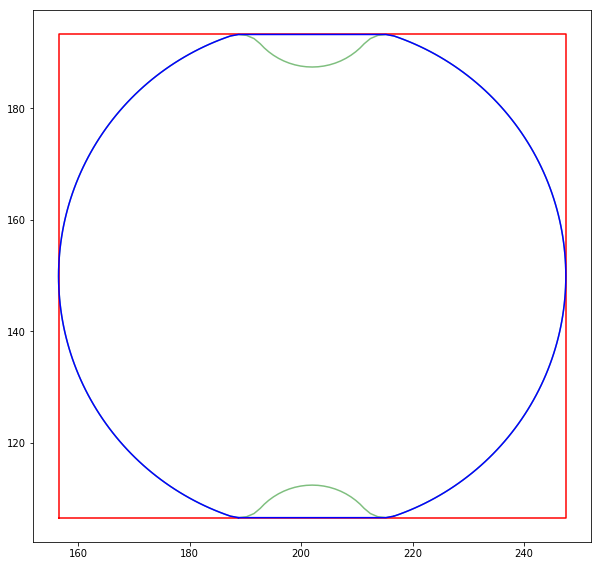

OK -  8  -  l3071970_flat1
color ID 3
7


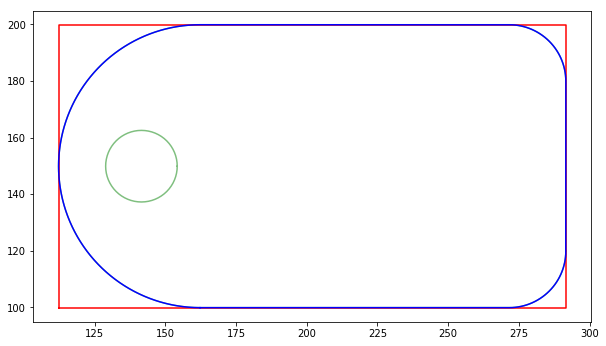

OK -  9  -  l3108260_flat1
color ID 3
74


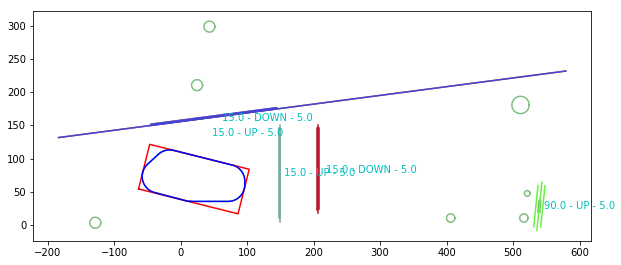

OK -  10  -  l3601370_flat1
color ID 3
8


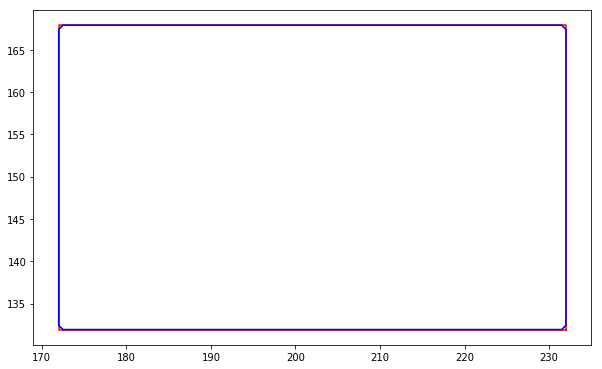

OK -  11  -  l3601381_flat1
color ID 3
NOK -  11  -  l3601381_flat1
OK -  12  -  l3621160_flat1
color ID 3
4


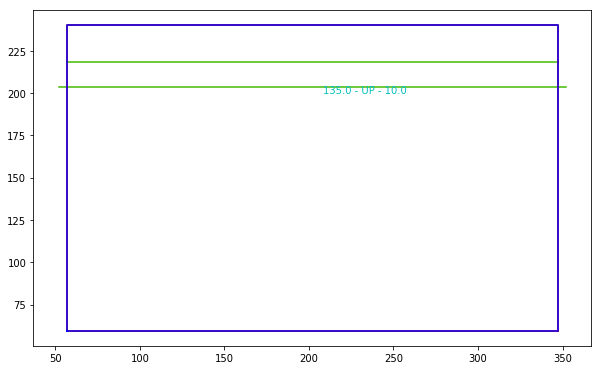

OK -  13  -  l3658400_flat1
color ID 3
NOK -  13  -  l3658400_flat1
OK -  14  -  l5623690_flat1
color ID 3
6


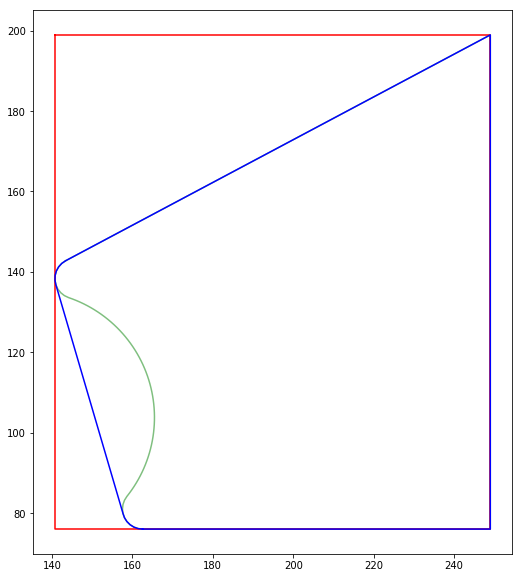

OK -  15  -  l5801080_flat1
color ID 7
19
NOK -  15  -  l5801080_flat1
OK -  16  -  l5801410_flat1
color ID 7
529
NOK -  16  -  l5801410_flat1
OK -  17  -  l6010400_flat1
color ID 3
18


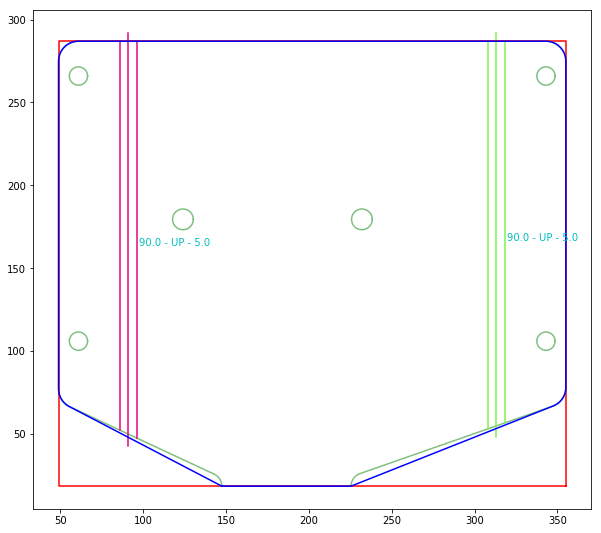

OK -  18  -  l6706120_flat1
color ID 7
25


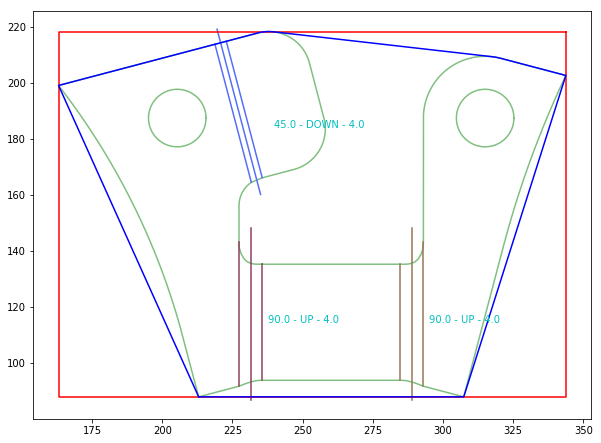

OK -  19  -  l6706130_flat1
color ID 3
57
NOK
NOK -  19  -  l6706130_flat1
OK -  20  -  l6706150_flat1
color ID 3
NOK -  20  -  l6706150_flat1
OK -  21  -  l6706160_flat1
color ID 7
NOK -  21  -  l6706160_flat1
OK -  22  -  l6706170_flat1
color ID 3
51


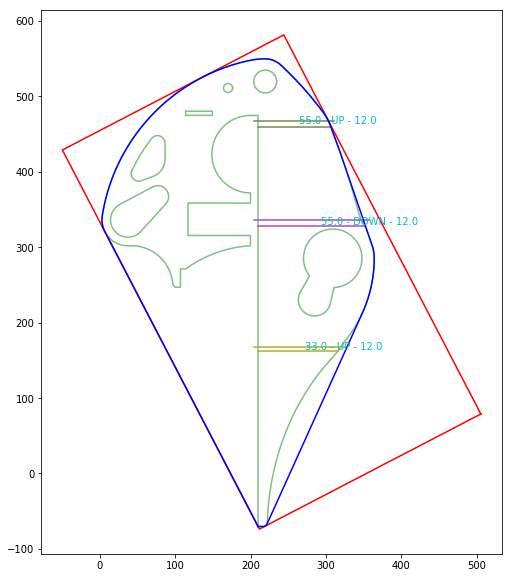

OK -  23  -  l7003610_flat1
color ID 3
NOK -  23  -  l7003610_flat1
OK -  24  -  l7003890_flat1
color ID 3
5


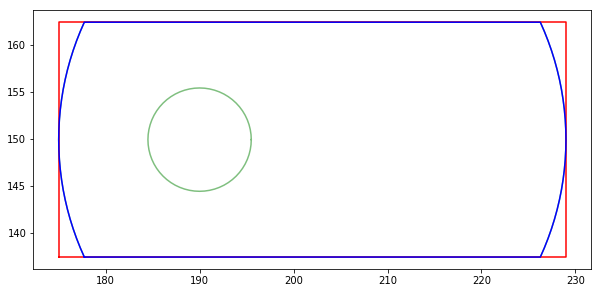

OK -  25  -  l7005381_flat1
color ID 7
34
NOK


/Users/cricket/Documents/ONline classes/A8 - veille thematique/sheet-metal-cost-calculator/Y1 - Notebooks/dxfreader.py:151: RuntimeWarning: Mean of empty slice.
  self.details['deformation_length'] = [np.array(np.array([LineString(coord).length for coord in tangentset]).mean()).sum() for tangentset in self.details['tangents_coords']]
/Users/cricket/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


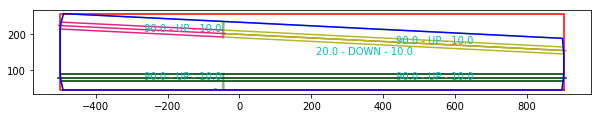

OK -  26  -  l7046970_flat1
color ID 7
4


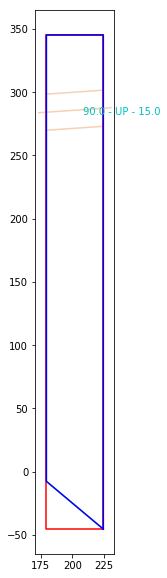

OK -  27  -  l7046980_flat1
color ID 3
9


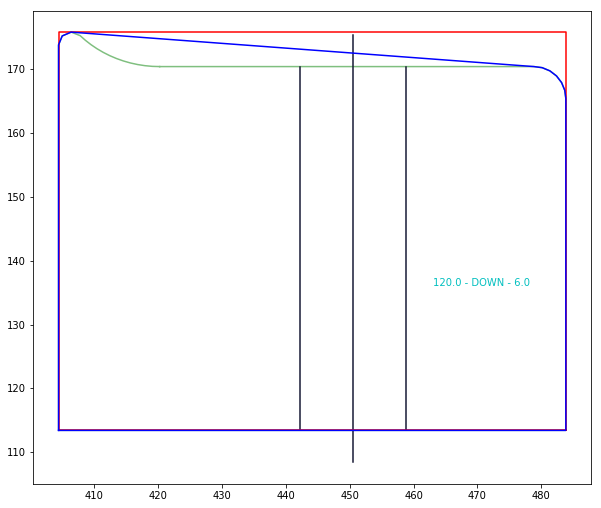

OK -  28  -  l7046990_flat1
color ID 3
9


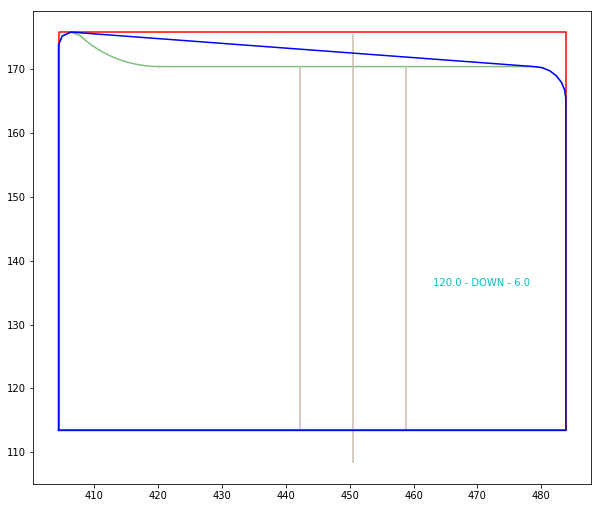

OK -  29  -  l7070730_flat1
color ID 7
16


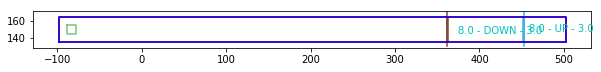

OK -  30  -  l7070760_flat1
color ID 3
8


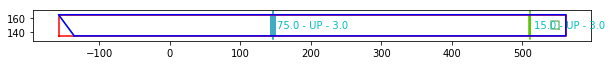

OK -  31  -  l8023770_flat1
color ID 7
31
NOK -  31  -  l8023770_flat1
OK -  32  -  l8023780_flat1
color ID 3
36
NOK -  32  -  l8023780_flat1
OK -  33  -  l8047460_flat1
color ID 7
19


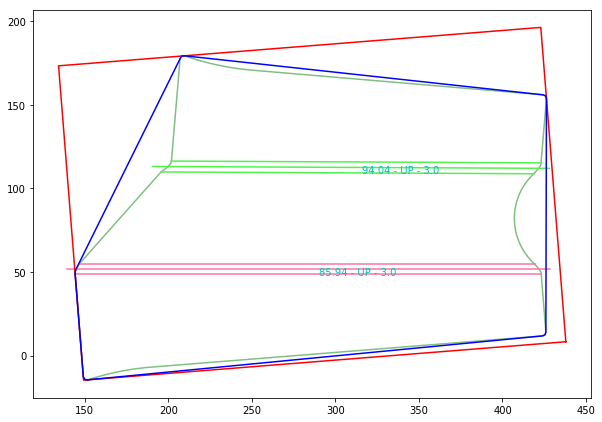

OK -  34  -  l8401470_flat1
color ID 3
22


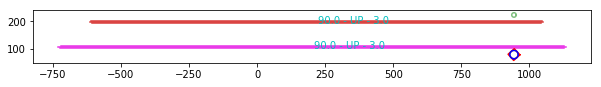

OK -  35  -  l8418910_flat1
color ID 3
NOK -  35  -  l8418910_flat1
OK -  36  -  l8819790_flat1
color ID 3
6


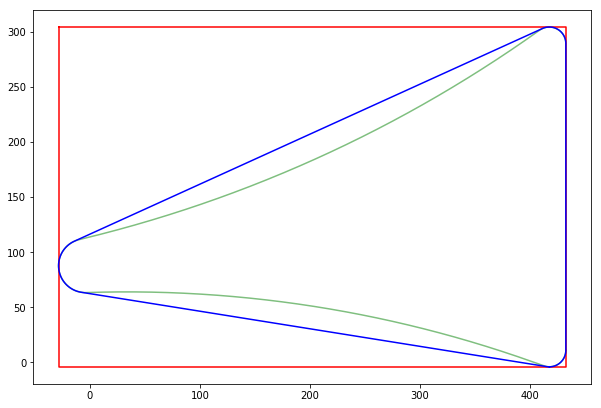

OK -  37  -  l8819800_flat1
color ID 3
18


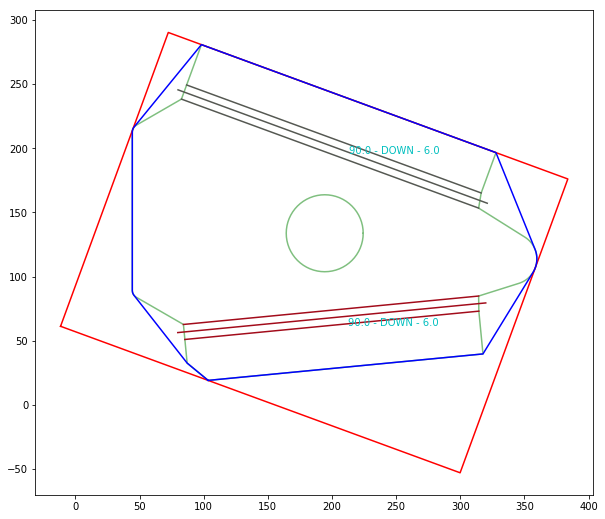

,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,bend_direction,deformation_length,possible_imperfection,bend_bend_distance,bend_bend_angle,merged_bend,punch_length,bend_edge_distance,bend_edge_angle,bend_edge_length
l1600620_flat1,2972.628000,1,0,394797.960000,394797.960000,1140.000000,346.314000,394797.960000,394797.960000,3.0,...,"[DOWN, DOWN]","[1140.0, 1140.0]",NaN,"[[120.6020627067], [120.6020627067]]","[[-0.0], [0.0]]","[0, 0]","[1150.0, 1150.0]","[[216.17399999999998, 121.89999999999999, 0.86...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[1140.0, 94.274, 118.44, 129.276, 1140.0, 129..."
l1603760_flat1,3213.784000,1,0,198561.024000,198561.024000,1472.000000,134.892000,198561.024000,198561.024000,3.0,...,"[DOWN, DOWN]","[1472.0, 1472.0]",NaN,"[[88.35308696], [88.35308696]]","[[0.0], [-0.0]]","[0, 0]","[1482.0, 1482.0]","[[0.8849999999999909, 28.536, 0.88499999999999...","[[90.0, 0.0, 90.0, 90.0, 0.0, 90.0], [90.0, 0....","[[27.65100000000001, 1472.0, 27.65100000000001..."
l1607120_flat1,4003.900000,1,0,783838.600000,783838.600000,1468.000000,533.950000,783838.600000,783838.600000,3.0,...,"[DOWN, DOWN, DOWN, DOWN]","[1468.0, 1468.0, 1468.0, 1468.0]",NaN,"[[74.26440762919998, 163.5103470418, 351.72089...","[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, ...","[0, 0, 0, 0]","[1478.0, 1478.0, 1478.0, 1478.0]","[[165.613, 0.9759999999999991, 0.9759999999999...","[[0.0, 90.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0...","[[1468.0, 164.637, 72.40299999999999, 87.34099..."
l1620100_flat1,3766.960000,1,0,776045.159500,776045.159500,1274.650000,608.830000,776045.159500,776045.159500,3.0,...,"[UP, DOWN, DOWN, DOWN, UP]","[1274.65, 1274.65, 1274.65, 1274.65, 1274.65]",NaN,"[[39.8684599652407, 78.68972296304011, 387.738...","[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [...","[0, 0, 0, 0, 0]","[1284.65, 1284.65, 1284.65, 1284.65, 1284.65]","[[15.269999999999998, 2.6569999999999965, 37.5...","[[0.0, 90.0, 90.0, 90.0, 90.0, 90.0, 0.0, 90.0...","[[1274.65, 26.896000000000008, 30.886999999999..."
l2516640_flat1,1681.069332,4,0,116527.777692,118871.760000,420.000000,283.028000,118871.760000,118033.520460,3.0,...,"[UP, UP]","[420.0, 420.0]",NaN,"[[214.26404898040002], [214.26404898040002]]","[[-0.0], [0.0]]","[0, 0]","[430.0, 430.0]","[[34.382000000000005, 3.132000000000005, 3.132...","[[0.0, 90.0, 90.0, 90.0, 0.0, 90.0, 90.0, 90.0...","[[368.502, 31.25, 208.0, 31.25, 368.5019999999..."
l3009412_flat1,1130.653343,2,0,35833.868325,42352.672465,468.491252,90.402270,36765.038139,36343.752997,10.0,...,[DOWN],[86.83517534681641],NaN,[],[],[],[98.38749030237534],"[[9.632947512811139, 0.0, 4.6768944566613415, ...","[[78.72997227572844, 75.6001043068583, 77.9962...","[[261.6313951440079, 295.7310005477952, 139.48..."
l3029670_flat1,1621.148113,3,0,77649.709730,107196.057298,661.693495,162.002586,80256.194412,78446.895802,8.0,...,[UP],[557.43529119105],NaN,[],[],[],[573.01],"[[62.54800000000001, 27.451000000000008, 36.72...","[[0.0, 90.0, 41.43045965961701, 7.834765900208...","[[523.0, 25.096999999999994, 47.98472708060346..."
l3047580_flat1,291.548363,1,0,6245.032738,7887.334000,91.000000,86.674000,6422.775053,6245.032738,NaN,...,[],[],NaN,[],[],[],[],[],[],[]
l3071970_flat1,577.930506,2,0,16181.808541,17929.000000,179.290000,100.000000,16683.722797,16683.722797,15.0,...,[],[],NaN,[],[],[],[],[],[],[]
l3108260_flat1,764.678291,9,0,7524.340719,10657.040806,154.264473,69.082924,9050.369449,9050.369449,5.0,...,"[UP, DOWN, UP, DOWN, UP]","[191.15850099190033, 191.15850099190033, 62.34...","[((-45.624, 149.781), (-54.242, 135.213))]","[[28.163926821244203, 510.6274717104524, 180.9...","[[0.0, -76.52814321354565, -82.52838272249961,...","[0, 0, 0, 0, 0]","[769.3926058287798, 769.3926058287798, 72.8672...","[[41.61792259168896, 44.40825037458653, 100.73...","[[21.508167076901458, 35.03771727343685, 22.21...","[[90.72699900801305

In [14]:
#List of all the dixs in the folder
dxffolder = '../Y2 - Sample DXF'
dxflist = [os.path.join(dxffolder, file) for file in os.listdir(dxffolder) if file.endswith('.dxf')]

columns = ['cut_length', 'num_closed_patterns', 'num_open_patterns', 'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1', 'minimum_rectangle_dim2',
           'convex_hull_area', 'no_hole_area', 'thickness', 'unit', 'material', 'radius', 'bend_radius',
           'bend_angle', 'bend_direction', 'deformation_length', 'possible_imperfection', 'bend_bend_distance',
           'bend_bend_angle', 'merged_bend', 'punch_length',
           'bend_edge_distance', 'bend_edge_angle', 'bend_edge_length']

dataset = pd.DataFrame(columns = columns)
from dxfreader import DxfParser
dxfparser = DxfParser(min_edge_length=1, roundigexp=3)
for index, dxffile in enumerate(dxflist[:]):
    name = dxffile.split('/')[-1]
    name = name.split('.')[0]


    try:
        print('OK - ', index, ' - ', name)
        details = dxfparser.parse(dxffile)
        plot_dxf(details)
    except:
        print('NOK - ', index, ' - ', name)
        details = {}
    dataset.loc[name] = [details.get(x, np.nan) for x in dataset.columns]
dataset.to_csv('../B1 - Reports/Z1 - dataset.csv')
dataset#.reset_index()

In [17]:
mask = dataset['num_closed_patterns'].isna()
print('DXF errors remaining :', dataset[mask].shape[0])

DXF errors remaining : 11


In [ ]:
dataset['thickness']

To add in the dataset:
- DONE + rectangle area
- DONE + rectangle dimension (height and width)
- DONE + Main area (no holes)
- DONE + convex hull area (no holes)
- DONE + Add the forgivness parameter
- bends:
    - DONE + Radius
    - DONE + Placement relative to outside edges (Min length, number, distance)
    - DONE + placement relative to other bends (Distance, Angle)
    - NOT NEEDED + Extend version of the bend lines
    - DONE + Punch length
    - DONE + Angle
    - DONE + Direction
    - DONE + Length of deformation
- DONE + Number of open loops
- DONE + Number of closed loops
- DONE + Cut Length
- DONE + Thickness
- DONE + Material grade